Trabajas en un centro de investigación de tendencias culturales y te han encargado un análisis sobre las  preferencias   
musicales  en  distintos  países.  Tu  tarea  es  aplicar  técnicas  de aprendizaje  de máquina no supervisado para extraer   
patrones de escucha y agrupar países según sus similitudes en consumo musical.  
1. Carga y exploración de datos (1 punto)  
    •Carga el dataset proporcionado, que contiene información sobre la popularidad de distinto géneros musicales en países   
    como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.   
    •Analiza las características del dataset, identificando distribuciones y tendencias iniciales.  
2. Aplicación de algoritmos de clusterización (5 puntos)  
    K-Means:  
        •Aplica el algoritmo K-Means con un valor inicial de K=3.   
        •Determina el valor óptimo de K utilizando el método del codo y el coeficiente de silueta.  
    Clustering jerárquico:  
        •Genera un dendrograma y determina el número óptimo de clusters.  
        •Aplica clustering jerárquico y compara con los resultados de K-Means.  
    DBSCAN:  
        •Aplica DBSCAN con diferentes valores de eps y MinPts.  
        •Justifica  la  elección  de  los  parámetros  y  analiza  si  DBSCAN  identifica  agrupaciones significativas.  
3. Aplicación de reducción de dimensionalidad (3 puntos)  
    PCA:  
        •Aplica PCA y determina cuántos componentes principales explican al menos el 90% de la varianza.  
        •Visualiza  los  países  en  un  gráfico  bidimensional  con  las  primeras  dos  componentes principales.  
    t-SNE:   
        •Aplica t-SNE para visualizar la relación entre los países en un espacio de 2D.  
        •Experimenta con diferentes valores de perplexity y analiza cómo afectan la representación.  
4. Análisis de resultados y conclusiones (1 punto)  
    Comparación de métodos:  
        •Explica las diferencias entre K-Means, clustering jerárquico y DBSCAN. ¿Cuál funcionó mejor en este caso y por qué?  
        •Compara los resultados obtenidos con PCA y t-SNE. ¿Cuál técnica permitió visualizar mejor la relación entre los países?  
    Interpretación:  
        •¿Los clusters obtenidos reflejan similitudes culturales o geográficas en la música?  
        •Relaciona los resultados con tendencias globales en consumo musical  

In [1]:
#1. Carga y exploración de datos (1 punto)
# •Carga el dataset proporcionado, que contiene información sobre la popularidad de distinto géneros musicales en países
# como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.
# •Analiza las características del dataset, identificando distribuciones y tendencias iniciales.

import pandas as pd

df = pd.read_csv("C:\\Users\\danna\\OneDrive\\Documentos\\GitHub\\data-science\\M7\\Evaluacion final\\dataset_generos_musicales.csv")
print('\nCaracterísticas de dataset: \n')
print(df.head())
print('\nInformación del dataset: \n')
print(df.info())
print('\nEstadísticas descriptivas: \n')
print(df.describe())


Características de dataset: 

     País  Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0   Chile   71    22       79           61       70    58        79     69
1    EEUU   34    41       40           79       74    37        90     23
2  México   91    72       52           99       83    23        63     21
3   Corea   80    21       95           34       22    79        27     25
4   Japón   40    49       77           81       70    33        66     73

Información del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   País         8 non-null      object
 1   Pop          8 non-null      int64 
 2   Rock         8 non-null      int64 
 3   Hip-Hop      8 non-null      int64 
 4   Electrónica  8 non-null      int64 
 5   Clásica      8 non-null      int64 
 6   Jazz         8 non-null      int64 
 7   Reguetón     8 no

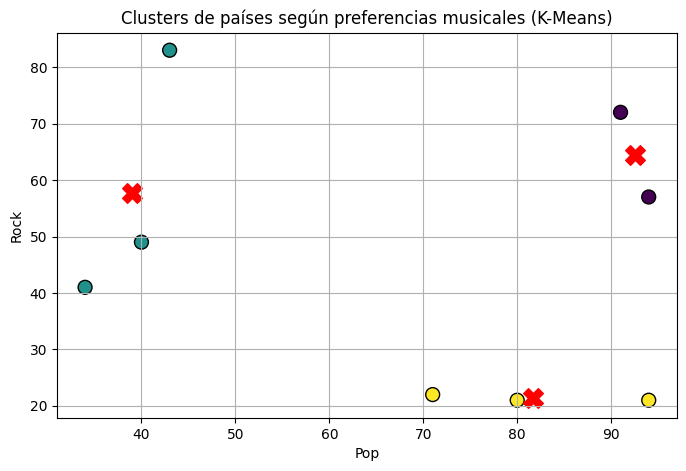

In [2]:
# 2. Aplicación de algoritmos de clusterización (5 puntos)
# K-Means:
# •Aplica el algoritmo K-Means con un valor inicial de K=3.
# •Determina el valor óptimo de K utilizando el método del codo y el coeficiente de silueta.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df.drop(columns=['País'])
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Visualización de los clusters
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('Clusters de países según preferencias musicales (K-Means)')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.grid()
plt.show()

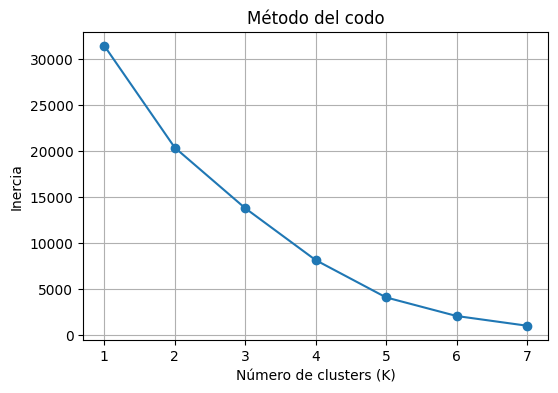

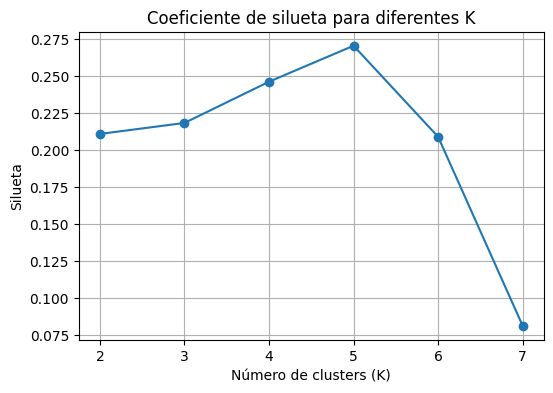

In [3]:
# Método del codo para determinar K óptimo
inertia = []
K_range = range(1, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.grid()
plt.show()

# Coeficiente de silueta para cada K
silhouette_scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Coeficiente de silueta para diferentes K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silueta')
plt.grid()
plt.show()

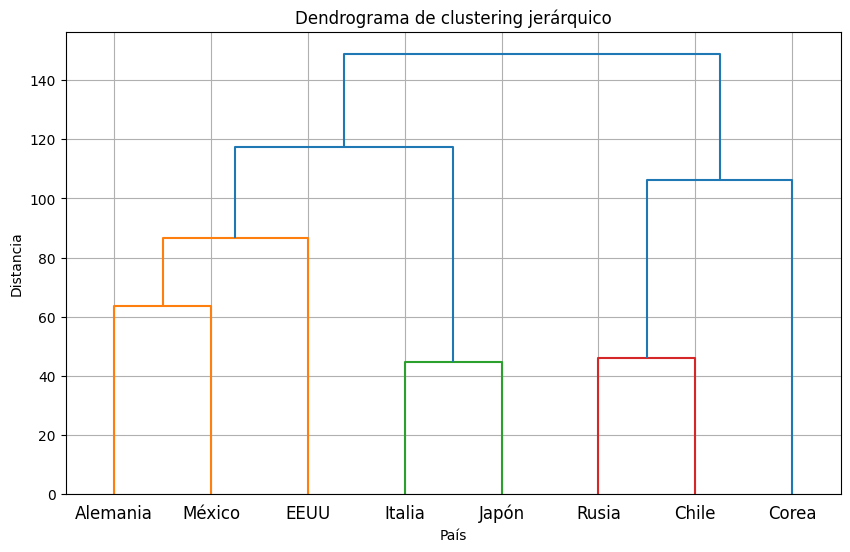

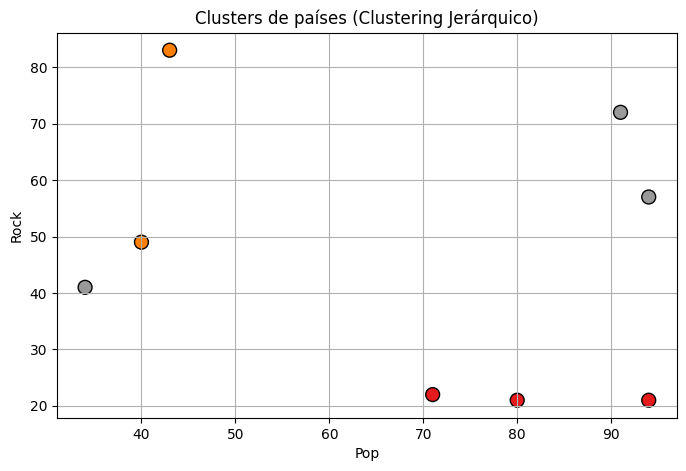

Etiquetas K-Means: [2 4 0 3 1 5 6 1]
Etiquetas Clustering Jerárquico: [1 3 3 1 2 3 1 2]


In [4]:
# Clustering jerárquico:
# •Genera un dendrograma y determina el número óptimo de clusters.
# •Aplica clustering jerárquico y compara con los resultados de K-Means.

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Genera el dendrograma
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df['País'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('País')
plt.ylabel('Distancia')
plt.grid()
plt.show()

# Determina el número óptimo de clusters (por inspección visual del dendrograma, por ejemplo 3)
n_clusters_hier = 3
hier_labels = fcluster(linked, n_clusters_hier, criterion='maxclust')

# Visualización de los clusters jerárquicos
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hier_labels, cmap='Set1', marker='o', edgecolor='k', s=100)
plt.title('Clusters de países (Clustering Jerárquico)')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.grid()
plt.show()

# Comparación de etiquetas
print("Etiquetas K-Means:", labels)
print("Etiquetas Clustering Jerárquico:", hier_labels)

DBSCAN eps=1.2, min_samples=2: clusters=0, ruido=8


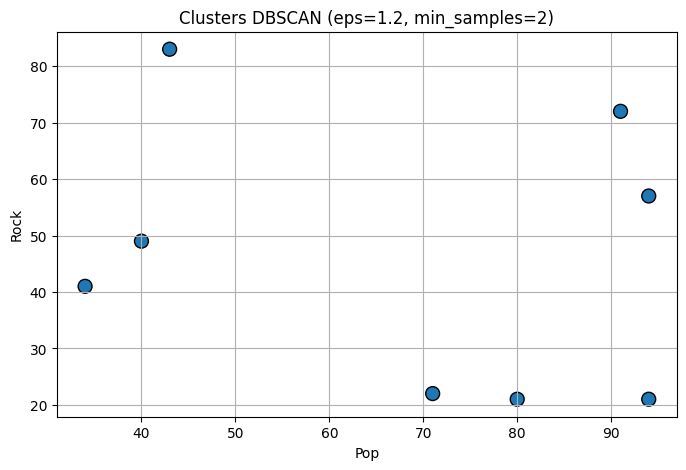

DBSCAN eps=1.5, min_samples=2: clusters=0, ruido=8


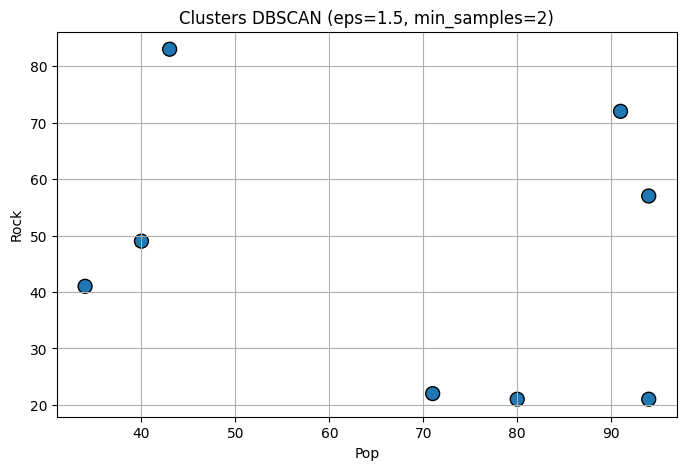

DBSCAN eps=2.0, min_samples=2: clusters=1, ruido=6


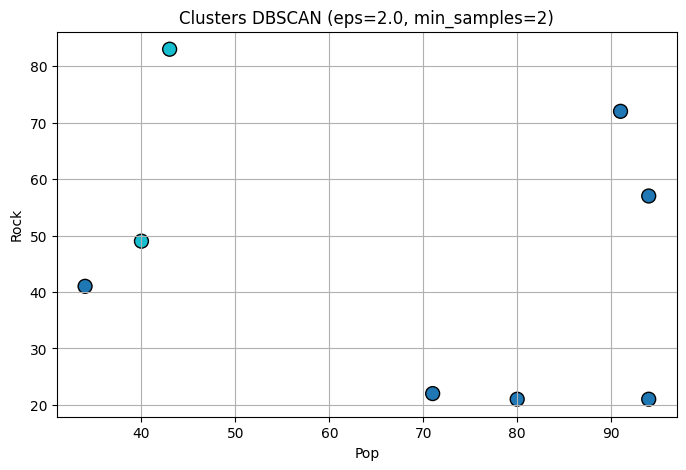

La elección de eps y min_samples depende de la escala de los datos y la cantidad de países. Se probaron varios valores para observar si DBSCAN identifica agrupaciones significativas. Si la mayoría de los puntos son ruido (-1), los parámetros deben ajustarse. DBSCAN es útil para detectar clusters de forma arbitraria y puntos atípicos.


In [5]:
# DBSCAN:
# •Aplica DBSCAN con diferentes valores de eps y MinPts.
# •Justifica  la  elección  de  los  parámetros  y  analiza  si  DBSCAN  identifica  agrupaciones significativas.
# Estandarización de los datos para DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prueba con diferentes valores de eps y min_samples
dbscan_params = [
    {'eps': 1.2, 'min_samples': 2},
    {'eps': 1.5, 'min_samples': 2},
    {'eps': 2.0, 'min_samples': 2}
]

for params in dbscan_params:
    db = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    db_labels = db.fit_predict(X_scaled)
    n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    n_noise = list(db_labels).count(-1)
    print(f"DBSCAN eps={params['eps']}, min_samples={params['min_samples']}: clusters={n_clusters_db}, ruido={n_noise}")
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=db_labels, cmap='tab10', marker='o', edgecolor='k', s=100)
    plt.title(f'Clusters DBSCAN (eps={params["eps"]}, min_samples={params["min_samples"]})')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.grid()
    plt.show()

# Justificación de parámetros:
print("La elección de eps y min_samples depende de la escala de los datos y la cantidad de países. Se probaron varios valores para observar si DBSCAN identifica agrupaciones significativas. Si la mayoría de los puntos son ruido (-1), los parámetros deben ajustarse. DBSCAN es útil para detectar clusters de forma arbitraria y puntos atípicos.")